<a href="https://colab.research.google.com/github/Fenilsavani-and/Clustering-Model-with-Internal-Validation-/blob/main/Final_MLFIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task - 2) **FRED** , FAMA French , ADS , CAPM Momentum , VOLUME of Netflix. -> Target column Y is Netflix Return.

In [1]:
pip install fredapi

In [2]:
import pandas as pd
from functools import reduce
from fredapi import Fred

In [3]:
# FAMA 5 Factors Data:
path='/content/drive/MyDrive/ML Finance/F-F_Research_Data_5_Factors_daily.CSV'
data_ff5 = pd.read_csv(path)
data_ff5['date'] = data_ff5['date'].astype(str).str[0:4]+'-'\
                    +data_ff5['date'].astype(str).str[4:6]+'-'\
                    +data_ff5['date'].astype(str).str[6:8]

data_ff5['date'] = pd.to_datetime(data_ff5['date'])
# data_ff5['date'] = data_ff5['date'].dt.date
df_ffs = data_ff5.set_index('date')
df_ffs.to_csv('fama.csv')

In [4]:
# ADS INDEX Data: (Aggregate Demand-Supply Index)
data_ads = pd.read_excel('/content/drive/MyDrive/ML Finance/ADS_Index_Most_Current_Vintage.xlsx')
# manually replace : into -
data_ads['date'] = pd.to_datetime(data_ads['date'])
df_ads = data_ads.set_index('date')
df_ads

,ADS_Index
date,
1960-03-01,-0.569062
1960-03-02,-0.617724
1960-03-03,-0.663306
1960-03-04,-0.705824
1960-03-05,-0.745294
...,...
2024-03-12,-0.046230
2024-03-13,-0.044420
2024-03-14,-0.042867


In [5]:
# FRED DATA :
fred = Fred(api_key='a46a25130b2938042810ca32abb5039a')

varList = ['T10Y3M', 'OBMMIJUMBO30YF',  # term premium 10yr-3mon, 30 yr mortgage jumbo loan
           'DEXUSEU', 'DEXJPUS', 'DEXUSUK', # spot exchange rates to EUR, JPY, GBP
           'CBBTCUSD', 'CBETHUSD',  # cryptocurrencies
               'T10YIE', 'DCOILBRENTEU', # breakeven inflation + brent oil price
               'VIXCLS', # implied volatilities
               'DAAA', 'DBAA', # corporate bond yield
               'NIKKEI225', 'AMERIBOR', 'T10YIE', 'T5YIE', 'BAMLH0A0HYM2','BAMLH0A0HYM2EY',
                              'DGS10', 'DGS1', 'RIFSPPFAAD90NB', 'DCPN3M', 'DCPF1M', 'DCOILWTICO',
                              'DHHNGSP', 'USRECD', 'USRECDM', 'USRECDP'] # JPN stock mkt index

df = pd.DataFrame()
SP500 = fred.get_series('SP500')
SP500.name = 'SP500'
df_fred = SP500

# merge data series
for i in range(0, len(varList)):
    data = fred.get_series(varList[i])
    data.name = varList[i]
    df_fred = pd.merge(df_fred, data, left_index=True, right_index=True)


In [6]:
start_date = '2021-01-01'
end_date = '2023-12-31'
mask = (df_ffs.index >= start_date) & (df_ffs.index <= end_date)
df_ffs = df_ffs.loc[mask]

DATA_part1 = pd.merge(df_ffs, df_ads, left_index=True, right_index=True)
DATA = pd.merge(DATA_part1, df_fred, left_index=True, right_index=True)
DATA.reset_index(inplace=True)
DATA = DATA.rename(columns = {'index':'Date'})

DATA.to_csv('INFOP7374_FeatureMart.csv', index=True)

In [7]:
df = pd.read_csv('/content/drive/MyDrive/ML Finance/INFOP7374_FeatureMart.csv')

In [8]:
df.dropna(inplace = True)

In [9]:
df.head()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,SP500,ADS_Index,T10Y3M,...,DGS10,DGS1,RIFSPPFAAD90NB,DCPN3M,DCPF1M,DCOILWTICO,DHHNGSP,USRECD,USRECDM,USRECDP
0,1/4/21,-1.41,0.16,0.58,-0.64,0.10,-0.030460,0.172399,0.679529,0.84,...,0.93,0.10,0.13,0.10,0.09,0.820504,2.60,0.0,0.0,0.0
1,1/5/21,0.86,1.32,0.49,0.36,0.55,-0.151746,0.708254,0.692205,0.87,...,0.96,0.10,0.15,0.11,0.10,4.866231,2.77,0.0,0.0,0.0
2,1/6/21,0.79,3.15,3.94,0.06,0.53,-0.219010,0.570990,0.703883,0.95,...,1.04,0.11,0.13,0.11,0.10,1.345922,2.76,0.0,0.0,0.0
3,1/7/21,1.76,0.02,-0.83,-1.50,-0.20,-0.275264,1.484736,0.714569,0.99,...,1.08,0.11,0.14,0.10,0.09,0.356789,2.81,0.0,0.0,0.0
4,1/8/21,0.51,-1.01,-1.37,-0.43,-0.37,0.039189,0.549189,0.724266,1.05,...,1.13,0.10,0.13,0.10,0.08,2.982421,2.77,0.0,0.0,0.0


In [10]:
# This is for Netflix Data :
import yfinance as yf

# Define the ticker symbol for Netflix
ticker_symbol = 'NFLX'

# Define the start and end dates
start_date = '2021-01-01'
end_date = '2023-12-31'

# Download data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Extract the desired columns
netflix_data = data[['Adj Close', 'Volume']]

netflix_data['NFLX_RT'] = (netflix_data['Adj Close'].pct_change())*100
netflix_data.dropna(inplace = True)
netflix_data = netflix_data.iloc[:,1:]

netflix_data.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-0b77fb5b9188>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data['NFLX_RT'] = (netflix_data['Adj Close'].pct_change())*100
<ipython-input-10-0b77fb5b9188>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data.dropna(inplace = True)


In [11]:
netflix_data.head()

,Date,Volume,NFLX_RT
0,2021-01-05,3133900,-0.393986
1,2021-01-06,5346200,-3.899769
2,2021-01-07,3686400,1.678360
3,2021-01-08,2973900,0.296720
4,2021-01-11,3806200,-2.213947


In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
netflix_data['Date'] = pd.to_datetime(netflix_data['Date'], format='%Y-%m-%d')
# Inner Join with Date:
df_c = pd.merge(df, netflix_data, on='Date', how='inner')

In [13]:
# Create CAPM column for Netflix stocks Expected return:
df_c['CAPM'] = (df_c['RF'] + 1.2*(df_c['NFLX_RT'] - df_c['RF']))

columns = df_c.columns.tolist()

# Swap the last two columns
columns[-1], columns[-2] = columns[-2], columns[-1]

df_c = df_c[columns]
df_c.head()


,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,SP500,ADS_Index,T10Y3M,...,DCPN3M,DCPF1M,DCOILWTICO,DHHNGSP,USRECD,USRECDM,USRECDP,Volume,CAPM,NFLX_RT
0,2021-01-05,0.86,1.32,0.49,0.36,0.55,-0.151746,0.708254,0.692205,0.87,...,0.11,0.10,4.866231,2.77,0.0,0.0,0.0,3133900,-0.442435,-0.393986
1,2021-01-06,0.79,3.15,3.94,0.06,0.53,-0.219010,0.570990,0.703883,0.95,...,0.11,0.10,1.345922,2.76,0.0,0.0,0.0,5346200,-4.635921,-3.899769
2,2021-01-07,1.76,0.02,-0.83,-1.50,-0.20,-0.275264,1.484736,0.714569,0.99,...,0.10,0.09,0.356789,2.81,0.0,0.0,0.0,3686400,2.069085,1.678360
3,2021-01-08,0.51,-1.01,-1.37,-0.43,-0.37,0.039189,0.549189,0.724266,1.05,...,0.10,0.08,2.982421,2.77,0.0,0.0,0.0,2973900,0.348226,0.296720
4,2021-01-11,-0.51,0.54,1.26,-0.17,0.45,-0.145480,-0.655480,0.741620,1.07,...,0.11,0.10,0.019179,2.71,0.0,0.0,0.0,3806200,-2.627641,-2.213947


In [14]:
df_c.set_index('Date', inplace = True)

# **Task - 3) Feature selection Ridge,  Lasso,  Elastic Net and LAR VS Random Forest,  XGBoost.**

In [15]:
import numpy as np
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import scipy.stats as ss
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from regressors import stats
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [16]:
scaler = MinMaxScaler()

df_s = pd.DataFrame(scaler.fit_transform(df_c), columns=df_c.columns)

In [17]:
# Lasso Regression

X = df_c.drop('NFLX_RT',axis=1)
Y = df_c['NFLX_RT']

a = 0.5
model1_prep = linear_model.Lasso(alpha=a, fit_intercept=False).fit(X, Y)
model1_select = X.columns[np.abs(model1_prep.coef_)!=0.0]
x = X[model1_select]
model1 = sm.OLS(Y,x).fit()
print(model1.summary())
y_pred_model1 = model1.predict(x)
corr_model1 = ss.pearsonr(y_pred_model1, Y)[0]
print('model 1 LASSO: corr (Y, Y_pred) = '+str(corr_model1))
print('LASSO selected ' +str(len(model1_select)) +' features: ', model1_select.values)

                                 OLS Regression Results                                
Dep. Variable:                NFLX_RT   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.711e+06
Date:                Thu, 04 Apr 2024   Prob (F-statistic):                        0.00
Time:                        03:14:40   Log-Likelihood:                          1760.6
No. Observations:                 752   AIC:                                     -3517.
Df Residuals:                     750   BIC:                                     -3508.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
# Ridge Regression:
a = 0.5
model2_prep = linear_model.Ridge(alpha=a, fit_intercept=False).fit(X, Y)
model2_select = X.columns[np.abs(model2_prep.coef_)>=0.001]
x = X[model2_select]
model2 = sm.OLS(Y,x).fit()
print(model2.summary())
y_pred_model2 = model2.predict(x)
corr_model2 = ss.pearsonr(y_pred_model2, Y)[0]
print('model 2 Ridge Regression: corr (Y, Y_pred) = '+str(corr_model2))
print('Ridge Regression selected ' +str(len(model2_select)) +' features: ', model2_select.values)


                                 OLS Regression Results                                
Dep. Variable:                NFLX_RT   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.201e+22
Date:                Thu, 04 Apr 2024   Prob (F-statistic):                        0.00
Time:                        03:14:44   Log-Likelihood:                          15932.
No. Observations:                 752   AIC:                                 -3.185e+04
Df Residuals:                     746   BIC:                                 -3.182e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.88634e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [19]:
# Elastic Net
a = 0.5
model3_prep = linear_model.ElasticNet(alpha=a, fit_intercept=False).fit(X, Y)
model3_select = X.columns[np.abs(model3_prep.coef_)!=0.0]
x = X[model3_select]
model3 = sm.OLS(Y,x).fit()
print(model3.summary())
y_pred_model3 = model3.predict(x)
corr_model3 = ss.pearsonr(y_pred_model3, Y)[0]
print('model 3 Elastic Net: corr (Y, Y_pred) = '+str(corr_model3))
print('ElasticNet selected ' +str(len(model3_select)) +' features: ', model3_select.values)


                                 OLS Regression Results                                
Dep. Variable:                NFLX_RT   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.656e+06
Date:                Thu, 04 Apr 2024   Prob (F-statistic):                        0.00
Time:                        03:14:46   Log-Likelihood:                          1776.1
No. Observations:                 752   AIC:                                     -3546.
Df Residuals:                     749   BIC:                                     -3532.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
# Least Angle Regression:

model4_prep = linear_model.Lars().fit(X, Y)
model4_select = X.columns[model4_prep.coef_>=0.001]
x = X[model4_select]
model4 = sm.OLS(Y,x).fit()
print(model4.summary())
y_pred_model4 = model4.predict(x)
corr_model4 = ss.pearsonr(y_pred_model1, Y)[0]
print('model 4 LARS: corr (Y, Y_pred) = '+str(corr_model4))
print('LARS selected ' +str(len(model4_select)) +' features: ', model4_select.values + '\n')


                                 OLS Regression Results                                
Dep. Variable:                NFLX_RT   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.700e+30
Date:                Thu, 04 Apr 2024   Prob (F-statistic):                        0.00
Time:                        03:14:50   Log-Likelihood:                          23553.
No. Observations:                 752   AIC:                                 -4.707e+04
Df Residuals:                     732   BIC:                                 -4.697e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 44 iterations, i.e. alpha=3.172e-03, with an active set of 34 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(


In [21]:
# Random Forest:

from sklearn.ensemble import RandomForestRegressor


# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, Y)

# Feature importances
feature_importances = rf.feature_importances_

# Get the indices of the features sorted by their importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature importance scores
print("Feature Importance Scores:")
F_df = pd.DataFrame({ 'Col_Name': X.columns,
                      'Score':feature_importances })
F_df = F_df.sort_values(by='Score', ascending=False)
print(F_df)





Feature Importance Scores:
          Col_Name     Score
37            CAPM  0.931394
36          Volume  0.054720
24    BAMLH0A0HYM2  0.001920
17          VIXCLS  0.000932
1              SMB  0.000770
21        AMERIBOR  0.000766
26           DGS10  0.000761
10         DEXUSEU  0.000636
5               RF  0.000602
13        CBBTCUSD  0.000545
3              RMW  0.000502
12         DEXUSUK  0.000491
32         DHHNGSP  0.000454
22        T10YIE_y  0.000441
27            DGS1  0.000390
16    DCOILBRENTEU  0.000366
31      DCOILWTICO  0.000350
6            SP500  0.000341
20       NIKKEI225  0.000336
2              HML  0.000328
8           T10Y3M  0.000296
18            DAAA  0.000269
14        CBETHUSD  0.000267
0           Mkt-RF  0.000250
15        T10YIE_x  0.000236
28  RIFSPPFAAD90NB  0.000231
9   OBMMIJUMBO30YF  0.000226
11         DEXJPUS  0.000224
25  BAMLH0A0HYM2EY  0.000219
19            DBAA  0.000198
4              CMA  0.000177
23           T5YIE  0.000107
30          DCPF

In [22]:
# Random Forest Tree:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# By Default it will take 39 Tree to build this model.

# Step 3: Fit the Random Forest model on the training data
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Step 4: Get feature importances
feature_importances = model.feature_importances_

# Step 5: Make predictions on the testing data
y_pred = model.predict(X_test)

# Step 6: Calculate the RMSE score
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE Score:", rmse)


RMSE Score: 1.1779031054431544


In [23]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the model to the training set

rfc_100.fit(X_train, y_train)

# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(mean_squared_error(y_test, y_pred_100, squared=False )))

Model accuracy score with 100 decision-trees : 1.1729


In [24]:
top_features = X.columns[sorted_indices[:10]]

top_feature_importances = feature_importances[sorted_indices[:10]]

# Create a Plotly bar chart
fig = go.Figure(go.Bar(
    x=top_feature_importances,
    y=top_features,
    orientation='h'
))

fig.update_layout(
    title='Top 10 Features by Importance',
    xaxis_title='Feature Importance',
    yaxis_title='Features',
    yaxis={'categoryorder':'total ascending'}
)

# Show plot
fig.show()

In [25]:
# XGBoost Model :

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Initialize XGBoost model
model = XGBRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the RMSE score
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE Score:", rmse)


RMSE Score: 0.957832406636657


In [26]:
X_df = pd.DataFrame({ 'Col_Name': X.columns,
                      'Score':feature_importances })
X_df = X_df.sort_values(by='Score', ascending=False)
print(X_df)

          Col_Name     Score
37            CAPM  0.792717
36          Volume  0.183734
0           Mkt-RF  0.018808
18            DAAA  0.002495
7        ADS_Index  0.000617
20       NIKKEI225  0.000282
11         DEXJPUS  0.000117
31      DCOILWTICO  0.000101
14        CBETHUSD  0.000092
6            SP500  0.000080
4              CMA  0.000078
5               RF  0.000075
8           T10Y3M  0.000073
32         DHHNGSP  0.000072
9   OBMMIJUMBO30YF  0.000063
21        AMERIBOR  0.000058
27            DGS1  0.000056
15        T10YIE_x  0.000049
23           T5YIE  0.000048
16    DCOILBRENTEU  0.000035
2              HML  0.000035
30          DCPF1M  0.000035
24    BAMLH0A0HYM2  0.000034
1              SMB  0.000032
13        CBBTCUSD  0.000031
10         DEXUSEU  0.000030
3              RMW  0.000026
29          DCPN3M  0.000025
17          VIXCLS  0.000022
12         DEXUSUK  0.000019
28  RIFSPPFAAD90NB  0.000018
26           DGS10  0.000017
25  BAMLH0A0HYM2EY  0.000015
19            

# **Task 4) Models for Main Dataset:**

In [ ]:
pip install catboost

In [ ]:

from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Model Name:

# Model with all features:

Models = [
    Ridge(random_state = 42),
    ExtraTreesRegressor(random_state = 42),
    GradientBoostingRegressor(random_state = 42),
    KNeighborsRegressor(),
    XGBRegressor(random_state = 42),
    LGBMRegressor(random_state = 42),
    CatBoostRegressor(random_state = 42, verbose = False),
    AdaBoostRegressor(random_state = 42),
    RandomForestRegressor(n_estimators=100,random_state = 42)
]
df_m = pd.DataFrame()
results = []
# Iterating over algorithms and printing scores
for reg in Models:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    results.append({'Model': type(reg).__name__, 'RMSE': rmse, 'R2': r2})

df_m= pd.DataFrame(results)

print(results)



In [74]:
df_m

,Model,RMSE,R2
0,Ridge,0.002770,0.999999
1,ExtraTreesRegressor,0.747633,0.960268
2,GradientBoostingRegressor,1.155606,0.905074
3,KNeighborsRegressor,4.112240,-0.202050
4,XGBRegressor,0.957832,0.934785
5,LGBMRegressor,1.628721,0.811436
6,CatBoostRegressor,1.400828,0.860513
7,AdaBoostRegressor,1.316862,0.876733
8,RandomForestRegressor,1.124799,0.910068


In [ ]:
# Model with selected Features with LAR Model:
LAR_fe = model4_select.values.tolist()

# add Y output column name:
LAR_fe.append('NFLX_RT')

df_m = df_c.loc[:, LAR_fe]

X1 = df_m.drop('NFLX_RT',axis=1)
Y1 = df_m['NFLX_RT']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Model with 20 selected features:

Models = [
    Ridge(random_state = 42),
    ExtraTreesRegressor(random_state = 42),
    GradientBoostingRegressor(random_state = 42),
    KNeighborsRegressor(),
    XGBRegressor(random_state = 42),
    LGBMRegressor(random_state = 42),
    CatBoostRegressor(random_state = 42, verbose = False),
    AdaBoostRegressor(random_state = 42),
    RandomForestRegressor(n_estimators=100,random_state = 42)
]

df_s = pd.DataFrame()
results = []
# Iterating over algorithms and printing scores
for reg in Models:
    reg.fit(X1_train, y1_train)
    y1_pred = reg.predict(X1_test)
    r2 = r2_score(y1_test, y1_pred)
    rmse = mean_squared_error(y1_test, y1_pred, squared = False)
    results.append({'Model': type(reg).__name__, 'RMSE': rmse, 'R2': r2})

df_s= pd.DataFrame(results)

print(results)



In [71]:
df_s

,Model,RMSE,R2
0,Ridge,0.003366,0.999999
1,ExtraTreesRegressor,0.555844,0.978038
2,GradientBoostingRegressor,1.064669,0.919426
3,KNeighborsRegressor,1.990655,0.718319
4,XGBRegressor,1.353498,0.869779
5,LGBMRegressor,1.687341,0.797618
6,CatBoostRegressor,1.437553,0.853103
7,AdaBoostRegressor,1.310040,0.878007
8,RandomForestRegressor,0.932184,0.938231


In [84]:
import pandas as pd
import plotly.graph_objects as go

# Extract columns
md = df_m['Model']
all_features = df_m['RMSE']
selected_features = df_s['RMSE']

# Create traces
trace1 = go.Scatter(x= md, y=all_features, mode='lines', name='all_features')
trace2 = go.Scatter(x= md, y=selected_features, mode='lines', name='selected_features')

# Create layout
layout = go.Layout(title='RMSE for all vs selected features', xaxis=dict(tickangle=-45))

# Create figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Display the plot
fig.show()


In [85]:
# Daily returns plot y_pred x y_test
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test, mode='lines', name='True Values'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_pred, mode='lines', name='Predicted Values'))
fig.update_layout(title='True vs. Predicted Values', xaxis_title='Index', yaxis_title='Values')
fig.show()

## Feature Importance for Random Forest and XGBoost Model:

<ipython-input-93-b88150613595>:17: UserWarning:

FixedFormatter should only be used together with FixedLocator



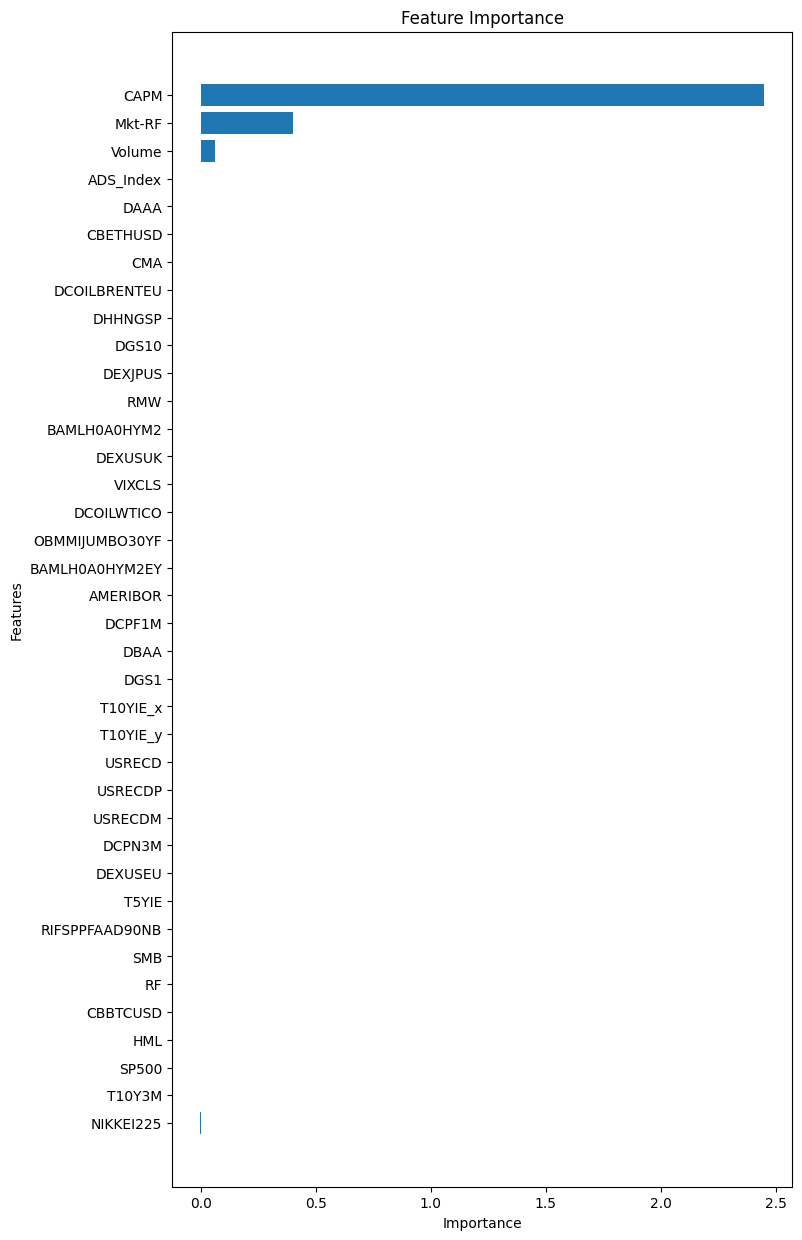

In [93]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42) # Computing feature importance

# Computing mean scores and obtaining features' names
importances = result.importances_mean
feature_names = X_test.columns

# Sorting Features importances and names
indices = importances.argsort()[::1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

# Plotting Feature Importance plot
fig, ax = plt.subplots(figsize = (8,15))
ax.barh(sorted_features, sorted_importances)
ax.set_yticklabels(sorted_features)
ax.set_ylabel('Features')
ax.set_xlabel('Importance')
ax.set_title('Feature Importance')
plt.show()

# Task 6) Trading rules that uses buy-and-hold, long-short, or day trade

In [183]:
# GRU Model for Prediction:

ticker_symbol = 'NFLX'

# Define the start and end dates
start_date = '2021-01-01'
end_date = '2023-12-31'

# Download data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

netflix_data = data[['Adj Close']]

netflix_data['NFLX_Close'] = netflix_data['Adj Close']
netflix_data.dropna(inplace = True)
netflix_data = netflix_data.iloc[:,1:]



[*********************100%%**********************]  1 of 1 completed
<ipython-input-183-5c589294a834>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-183-5c589294a834>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [184]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(netflix_data).reshape(-1,1))

In [185]:
df1.shape

(753, 1)

In [186]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [187]:
len(train_data),len(test_data)

(489, 264)

In [188]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99 will go in Training   100th step is results for training model.
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [189]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [190]:
print(X_train.shape), print(y_train.shape)

(388, 100)
(388,)


(None, None)

In [191]:
print(X_test.shape), print(ytest.shape)

(163, 100)
(163,)


(None, None)

In [192]:
# reshape input to be [samples, time steps, features] which is required for GRU
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [193]:
X_train.shape

(388, 100, 1)

In [194]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error

In [208]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='linear'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='linear'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='linear'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='linear'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer='Adagrad',loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
3/3 [==============================] - 12s 315ms/step - loss: 0.2873
Epoch 2/50
3/3 [==============================] - 1s 323ms/step - loss: 0.2587
Epoch 3/50
3/3 [==============================] - 1s 319ms/step - loss: 0.2369
Epoch 4/50
3/3 [==============================] - 1s 346ms/step - loss: 0.2183
Epoch 5/50
3/3 [==============================] - 1s 316ms/step - loss: 0.2034
Epoch 6/50
3/3 [==============================] - 1s 316ms/step - loss: 0.1907
Epoch 7/50
3/3 [==============================] - 1s 356ms/step - loss: 0.1799
Epoch 8/50
3/3 [==============================] - 2s 519ms/step - loss: 0.1693
Epoch 9/50
3/3 [==============================] - 2s 534ms/step - loss: 0.1577
Epoch 10/50
3/3 [==============================] - 1s 312ms/step - loss: 0.1502
Epoch 11/50
3/3 [==============================] - 1s 311ms/step - loss: 0.1432
Epoch 12/50
3/3 [==============================] - 1s 309ms/step - loss: 0.1379
Epoch 13/50
3/3 [==============================]

In [209]:
### Lets Do the prediction and check performance metrics
train_predict=regressorGRU.predict(X_train)
test_predict=regressorGRU.predict(X_test)

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

6/6 [==============================] - 0s 41ms/step


In [210]:
# Calculate RMSE:
math.sqrt(mean_squared_error(y_train,train_predict))

398.65801020348584

In [211]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

400.0137362890995